<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ДЗ-3" data-toc-modified-id="ДЗ-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ДЗ-3</a></span><ul class="toc-item"><li><span><a href="#A.-Нетеплицева-матрица" data-toc-modified-id="A.-Нетеплицева-матрица-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>A. Нетеплицева матрица</a></span><ul class="toc-item"><li><span><a href="#numpy" data-toc-modified-id="numpy-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>numpy</a></span></li><li><span><a href="#цикл" data-toc-modified-id="цикл-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>цикл</a></span></li></ul></li></ul></li><li><span><a href="#B.-Подматрица-с-нужным-детерминантом" data-toc-modified-id="B.-Подматрица-с-нужным-детерминантом-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>B. Подматрица с нужным детерминантом</a></span><ul class="toc-item"><li><span><a href="#C.-Коммиты" data-toc-modified-id="C.-Коммиты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>C. Коммиты</a></span><ul class="toc-item"><li><span><a href="#pandas" data-toc-modified-id="pandas-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>pandas</a></span></li><li><span><a href="#словари" data-toc-modified-id="словари-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>словари</a></span></li><li><span><a href="#словари-+-pandas" data-toc-modified-id="словари-+-pandas-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>словари + pandas</a></span></li></ul></li><li><span><a href="#D.-Нетворкинг" data-toc-modified-id="D.-Нетворкинг-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>D. Нетворкинг</a></span><ul class="toc-item"><li><span><a href="#pandas-+-Counter" data-toc-modified-id="pandas-+-Counter-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>pandas + Counter</a></span></li><li><span><a href="#pandas" data-toc-modified-id="pandas-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>pandas</a></span></li></ul></li></ul></li><li><span><a href="#СР-3" data-toc-modified-id="СР-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>СР-3</a></span><ul class="toc-item"><li><span><a href="#B-3" data-toc-modified-id="B-3-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>B-3</a></span></li><li><span><a href="#B-2" data-toc-modified-id="B-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>B-2</a></span></li></ul></li><li><span><a href="#ДЗ-3:-Дефолты" data-toc-modified-id="ДЗ-3:-Дефолты-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ДЗ-3: Дефолты</a></span><ul class="toc-item"><li><span><a href="#7-гистограммы" data-toc-modified-id="7-гистограммы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>7-гистограммы</a></span></li><li><span><a href="#9-корреляция" data-toc-modified-id="9-корреляция-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>9-корреляция</a></span></li></ul></li></ul></div>

# ДЗ-3

## A. Нетеплицева матрица

### numpy

In [1]:
import numpy as np
x = np.array(list(map(int, input().split())))
x


1 2 3 4 5


array([1, 2, 3, 4, 5])

In [2]:
x

array([1, 2, 3, 4, 5])

In [3]:
n = x.size
A = np.vstack([np.roll(x, i) for i in range(n)])
A


array([[1, 2, 3, 4, 5],
       [5, 1, 2, 3, 4],
       [4, 5, 1, 2, 3],
       [3, 4, 5, 1, 2],
       [2, 3, 4, 5, 1]])

In [4]:
np.triu(A)

array([[1, 2, 3, 4, 5],
       [0, 1, 2, 3, 4],
       [0, 0, 1, 2, 3],
       [0, 0, 0, 1, 2],
       [0, 0, 0, 0, 1]])

In [5]:
np.tril(A.T, -1)

array([[0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [3, 2, 0, 0, 0],
       [4, 3, 2, 0, 0],
       [5, 4, 3, 2, 0]])

In [6]:
ans = np.tril(A.T, -1) + np.triu(A)
ans

array([[1, 2, 3, 4, 5],
       [2, 1, 2, 3, 4],
       [3, 2, 1, 2, 3],
       [4, 3, 2, 1, 2],
       [5, 4, 3, 2, 1]])

In [7]:
ans[np.arange(1, n, 2)] = ans[np.arange(1, n, 2)][:n,::-1]
print(ans.astype(int))

[[1 2 3 4 5]
 [4 3 2 1 2]
 [3 2 1 2 3]
 [2 1 2 3 4]
 [5 4 3 2 1]]


### цикл

In [12]:
x = list(map(int, input().split()))
xx = list(x[::-1][:-1]) + list(x)
A = []
for i in range(len(xx),0,-1):
    if i%2!=0:
        A.append(xx[i:i+n][::-1])
    else:
        A.append(xx[i:i+n])
        
print(*A, sep='\n')

1 2 3 4 5
[]
[5]
[5, 4]
[3, 4, 5]
[5, 4, 3, 2]
[1, 2, 3, 4, 5]
[4, 3, 2, 1, 2]
[3, 2, 1, 2, 3]
[2, 1, 2, 3, 4]


# B. Подматрица с нужным детерминантом

In [13]:
import numpy as np
from math import ceil
a = np.array([list(map(float,x.split())) for x in input().split(';')])
b = np.array([list(map(float,x.split())) for x in input().split(';')])


1 2; 3 4
1 2; 3 4


In [14]:
print(a)
print(b)

[[1. 2.]
 [3. 4.]]
[[1. 2.]
 [3. 4.]]


In [15]:
n = a.shape[0]
ans = False
for i in range(n):
    for j in range(n):
        for m in range(n):
            M = a[i:(i+m),j:(j+m)]
            if M.shape[0]==M.shape[1] and np.isclose(np.linalg.det(M), b[i,j]):
                ans = True
                break
print(ans)

True


## C. Коммиты

### pandas

In [16]:
import pandas as pd
from pandas.io.json import json_normalize
import json

with open('commits.json', 'r') as inp:
    data = json.load(inp)
    
raw_data = json_normalize(data, 'files', ['username', 'commit_time'])
raw_data

<ipython-input-16-32b0caa6f700>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  raw_data = json_normalize(data, 'files', ['username', 'commit_time'])


,name,changed_lines,username,commit_time
0,utils/net.py,85,bober38,2021/03/12 05:45:02
1,library/utils.py,36,coder007,2021/03/02 15:01:24
2,quality/utils.py,38,vanessic,2021/01/22 10:14:08
3,core/library.py,17,john_snow,2021/01/16 15:21:07
4,frontend/tools.py,6,john_snow,2021/01/16 15:21:07
...,...,...,...,...
197,balancer/library.py,96,zeno,2021/02/07 21:37:49
198,frontend/net.py,28,zeno,2021/02/07 21:37:49
199,backend/utils.py,23,ivan_ivanov,2021/03/14 03:24:59
200,library/tools.py,53,ivan_ivanov,2021/03/14 03:24:59


In [17]:
raw_data.groupby('username')['changed_lines'].sum()

username
bober38         885
coder007        396
ivan_ivanov    1473
john_snow      1211
pet            1896
vanessic       1622
yegor          1341
zeno           1211
Name: changed_lines, dtype: int64

In [18]:
raw_data.groupby('username')['commit_time'].nunique()

username
bober38        12
coder007        7
ivan_ivanov    15
john_snow      12
pet            14
vanessic       14
yegor          14
zeno           12
Name: commit_time, dtype: int64

In [19]:
agg = raw_data.groupby(['name','username'])[['commit_time']].min().sort_values(['name','commit_time'])
agg

commit_time
name               username                        
backend/library.py vanessic     2021/01/16 05:58:01
                   john_snow    2021/01/18 00:13:13
                   yegor        2021/03/13 15:34:49
                   ivan_ivanov  2021/03/14 03:24:59
                   coder007     2021/03/17 05:24:34
...                                             ...
utils/tools.py     vanessic     2021/03/15 07:39:18
utils/utils.py     john_snow    2021/01/03 06:01:48
                   coder007     2021/01/16 20:52:16
                   yegor        2021/02/27 10:56:31
                   ivan_ivanov  2021/03/01 11:29:35

[125 rows x 1 columns]

In [20]:
agg = raw_data.groupby(['name','username'])[['commit_time']].min().sort_values(['name','commit_time'])
d = {}
for file in agg.reset_index()['name'].unique():
    d[file] = agg.loc[file].iloc[0].name
d = pd.DataFrame([d]).T.reset_index().groupby(0).count().to_dict()['index'] 
d

{'bober38': 2,
 'coder007': 1,
 'ivan_ivanov': 4,
 'john_snow': 4,
 'pet': 2,
 'vanessic': 7,
 'yegor': 7,
 'zeno': 1}

### словари

In [22]:
import pandas as pd
import json
from collections import defaultdict

with open('commits.json') as json_file:
    data = json.load(json_file)
    
data = sorted(data, key=lambda x: x['commit_time'])

new_files = set()
table = defaultdict(lambda: {'commits':0, 'changed_lines':0, 'new_files':0})

for comit in data:
    user = comit['username']
    table[user]['commits'] +=1
    for file in comit['files']:
        table[user]['changed_lines'] += file['changed_lines']
        if file['name'] not in new_files:
            new_files.add(file['name'])
            table[user]['new_files'] += 1

table

defaultdict(<function __main__.<lambda>()>,
            {'yegor': {'commits': 14, 'changed_lines': 1341, 'new_files': 7},
             'coder007': {'commits': 7, 'changed_lines': 396, 'new_files': 1},
             'bober38': {'commits': 12, 'changed_lines': 885, 'new_files': 2},
             'ivan_ivanov': {'commits': 15,
              'changed_lines': 1473,
              'new_files': 4},
             'john_snow': {'commits': 12,
              'changed_lines': 1211,
              'new_files': 4},
             'vanessic': {'commits': 14,
              'changed_lines': 1622,
              'new_files': 7},
             'zeno': {'commits': 12, 'changed_lines': 1211, 'new_files': 1},
             'pet': {'commits': 14, 'changed_lines': 1896, 'new_files': 2}})

In [23]:
data[0]

{'username': 'yegor',
 'commit_time': '2021/01/01 03:14:55',
 'files': [{'name': 'utils/tools.py', 'changed_lines': 51},
  {'name': 'balancer/tools.py', 'changed_lines': 22},
  {'name': 'library/utils.py', 'changed_lines': 75}]}

In [24]:
df = pd.DataFrame(table).T
df.index.name = 'username'
print(df.sort_index().reset_index().to_string(index=False))

   username  commits  changed_lines  new_files
    bober38       12            885          2
   coder007        7            396          1
ivan_ivanov       15           1473          4
  john_snow       12           1211          4
        pet       14           1896          2
   vanessic       14           1622          7
      yegor       14           1341          7
       zeno       12           1211          1


### словари + pandas

In [26]:
import pandas as pd
from pandas.io.json import json_normalize
import json

with open('commits.json', 'r') as inp:
    data = json.load(inp)
    
raw_data = json_normalize(data, 'files', ['username', 'commit_time'])
raw_data.commit_time = pd.to_datetime(raw_data.commit_time, format="%Y/%m/%d %H:%M:%S")
raw_data.sort_values(by='commit_time', inplace=True)

users = dict()
files = dict()

for ind, row in raw_data.iterrows():    
    file, lines, user, time = row['name'], row['changed_lines'] ,row['username'], row['commit_time']
    if user not in users:
        users[user] = {'username': user, 'commits': set(), 'changed_lines': 0, 'new_files': 0}
    if file not in files:
        files[file] = user
        users[user]['new_files'] += 1
    users[user]['changed_lines'] += int(lines)
    users[user]['commits'].add(time)
    
for user in users:
    users[user]['commits'] = len(users[user]['commits'])
    
result = pd.DataFrame.from_dict(users, columns=['username', 'commits', 'changed_lines', 'new_files'], orient='index')
result.sort_values(by='username', inplace=True)
print(result.to_string(index=False))
    

   username  commits  changed_lines  new_files
    bober38       12            885          2
   coder007        7            396          1
ivan_ivanov       15           1473          4
  john_snow       12           1211          4
        pet       14           1896          2
   vanessic       14           1622          7
      yegor       14           1341          7
       zeno       12           1211          1


<ipython-input-26-ec8578b9cd6a>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  raw_data = json_normalize(data, 'files', ['username', 'commit_time'])


## D. Нетворкинг

### pandas + Counter

In [27]:
import pandas as pd
from collections import Counter

f = open("networking.tsv", "r").read()
s = [x.split('\t') for x in f.split('\n')][:-1]

agg = pd.DataFrame(Counter(sum(s,[])).items(), columns=['person','links_count'])
agg = agg.sort_values(by=['links_count','person'], ascending=[False,True]).head()
print(agg.to_string(index=False))

             person  links_count
        Sergey Brin            7
            Jack Ma            6
Laurene Powell Jobs            6
   Alexey Mordashov            5
         Hui Ka Yan            5


In [28]:
# sorted(s, key=lambda x: (x[1], x[0]))

In [29]:
s[:5]

[['Laurene Powell Jobs', 'Azim Premji'],
 ['Tadashi Yanai', 'Amancio Ortega'],
 ['He Xiangjian', 'Joseph Safra'],
 ['Bill Gates', 'Stefan Persson'],
 ['Sergey Brin', 'S. Robson Walton']]

### pandas

In [30]:
import pandas as pd


# df = pd.DataFrame([x.split('\t') for x in f.split('\n')])
df = pd.read_csv('networking.tsv', sep='\t', header=None)

agg = (df[0].value_counts() + df[1].value_counts()).dropna().astype(int)
agg = pd.DataFrame(agg).reset_index()
agg.columns = ['person','links_count']
agg = agg.sort_values(by=['links_count','person'], ascending=[False,True]).head()
print(agg.to_string(index=False))

             person  links_count
        Sergey Brin            7
            Jack Ma            6
Laurene Powell Jobs            6
   Alexey Mordashov            5
         Hui Ka Yan            5


# СР-3

## B-3
- Дан файл с результатами соревнований пар в спортивных танцах на льду, записанными в произвольном порядке. 
- Напишите программу, которая по названию страны определяет партнершу из пары, занявшей самое высокое место. 


- ФОРМАТ ВВОДА 
- Файл skating.txt в кодировке utf-8, где на каждой строке записан результат соревнований пары в формате 
    - "<место> - <имя партнерши> / <имя партнера>, <страна>". 
    - Например, "1 место - Габриэлла Пападакис / Гийом Сизерон, Франция".
- Гарантируется, что в файле есть минимум одна строка.


- ВАЖНО! 
- Ваше решение будет проверяться на закрытых тестах. 
- Ваш код должен считывать файл 'skating.txt' без дополнительных указаний (например, пути к файлу на вашем компьютере).
- С клавиатуры вводится название страны.


- ФОРМАТ ВЫВОДА
- Строка, имя и через пробел фамилия партнерши из введенной страны, занявшей самое высокое место.


- ДОПОЛНИТЕЛЬНО
- В открытом тесте используется файл skating.txt. Вы можете скачать его и проверить свое решение локально.
- В примере в первой колонке отображается номер теста (0 — открытый тест), считывать это число или использовать его в вашем решении не нужно.


In [31]:
ex = '1 место - Габриэлла Пападакис / Гийом Сизерон, Франция'

In [32]:
exs = '''1 место - q w / a b, fr
2 место - q w / e r, ru
3 место - a b / q w, fr
4 место - c d / q w, fr
5 место - a b / c d, ru'''

In [33]:
exs

'1 место - q w / a b, fr\n2 место - q w / e r, ru\n3 место - a b / q w, fr\n4 место - c d / q w, fr\n5 место - a b / c d, ru'

In [34]:
data = [x.replace(' место -',',').replace(' /',',').split(', ') for x in exs.split('\n')]
data

[['1', 'q w', 'a b', 'fr'],
 ['2', 'q w', 'e r', 'ru'],
 ['3', 'a b', 'q w', 'fr'],
 ['4', 'c d', 'q w', 'fr'],
 ['5', 'a b', 'c d', 'ru']]

In [35]:
country = 'ru' #input()
data = [x for x in data if x[3]==country]
data

[['2', 'q w', 'e r', 'ru'], ['5', 'a b', 'c d', 'ru']]

In [36]:
best_pair = min(data, key=lambda x: int(x[0]))
best_pair

['2', 'q w', 'e r', 'ru']

In [37]:
print(best_pair[1])

q w


## B-2

In [39]:
tickets = {}
winners = set()

ticket = input()

while ticket != 'КОНЕЦ':
    name, number = ticket.split('; ')
    if name not in tickets:
        tickets[name] = []
    tickets[name].append(number)
    ticket = input()

win_numbers = set(input().split())



h; 20
g; 10
r; 1
r; 10
КОНЕЦ
1 10


In [40]:
win_numbers

{'1', '10'}

In [41]:
tickets

{'h': ['20'], 'g': ['10'], 'r': ['1', '10']}

In [42]:
for name in tickets:
    if len(set(tickets[name]) & win_numbers)>0:
        winners.add(name)

In [43]:
print(*sorted(winners), sep=', ')

g, r


# ДЗ-3: Дефолты

## 7-гистограммы

7. Постройте гистограмму по суммам предоставленных кредитов (*LIMIT_BAL*) для каждой из групп клиентов отдельно (с дефолтом и без). (один график)
8. На основе графика из предыдущего пункта, ответьте на вопросы: <br>
8.1 По кредитам какого размера чаще всего происходят дефолты? <br>
8.2 Начиная от какой суммы кредита клиентов без дефолта становится больше, чем клиентов с дефолтом? <br>
8.3  Как по графику определить, есть ли такие одобренные суммы кредитов, по которым никогда не происходит дефолт? Выведите значения а) сумм кредитов, по которым всегда встречается дефолт, б) и те, по которым никогда не бывает дефолта. <br>
9. Постройте матрицу корреляций для всех переменных по статусу погашения кредита. Добавьте значения корреляций на график. Есть ли общий тренд по возрастанию/убыванию корреляции по времени (всем месяцам)? <br>
10. Напишите функцию, которая возвращает словарь, где ключ - это сумма одобренного кредита, а значение - это вложенный словарь. В нем по ключу ```ratio``` хранится отношение клиентов с дефолтом к тем, у кого его не было, с такой суммой кредитов, а по ключу ```num_clients```  - общее число клиентов с таким кредитом. Пример элемента словаря: ``` {50000.0 : {'ratio': 0.357, 'num_clients': 3365}```. Отсортируйте получившийся словарь по ключу ```ratio``` в убывающем порядке. У какого размера кредита наибольшая доля клиентов с дефолтом? А сколько в датасете клиентов, по которым посчитана эта доля? Можем ли мы сделать вывод, что в целом не стоит одобрять эту сумму для кредита новым клиентам? <br>

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('defaults.csv')
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


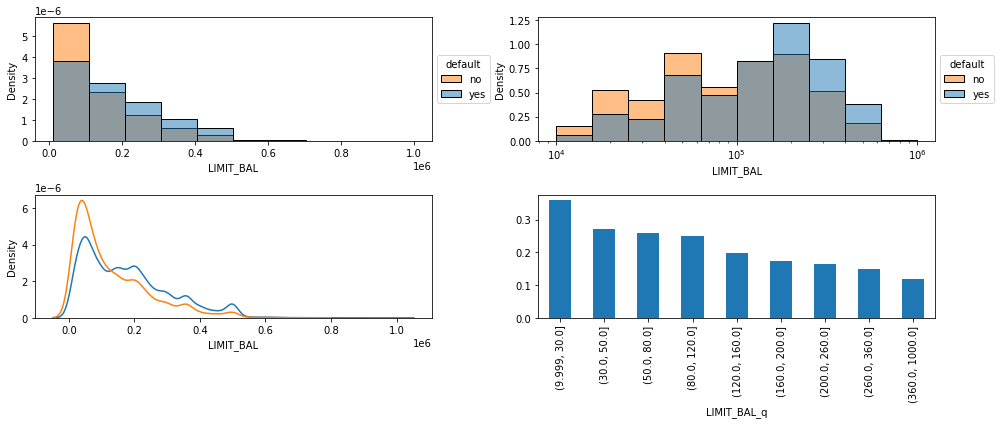

In [46]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
g = sns.histplot(data=df, x='LIMIT_BAL', hue='default.payment.next.month',  
             bins=10,
             common_norm=False, stat='density',
             #log_scale=True
            )
plt.legend(['no','yes'],title='default',loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2,2,3)
sns.kdeplot(x=df[df['default.payment.next.month']==0]['LIMIT_BAL'])
sns.kdeplot(x=df[df['default.payment.next.month']==1]['LIMIT_BAL'])

plt.subplot(2,2,2)
sns.histplot(data=df, x='LIMIT_BAL', hue='default.payment.next.month', 
             bins=10, log_scale=True, 
             common_norm=False, 
             stat='density')
plt.legend(['no','yes'],title='default',loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2,2,4)
df['LIMIT_BAL_q'] = pd.qcut((df['LIMIT_BAL']/1e3).round().astype(int), q=np.linspace(0,1,10), duplicates='drop')
df.groupby('LIMIT_BAL_q')['default.payment.next.month'].mean().plot(kind='bar')

plt.tight_layout()
plt.show()

## 9-корреляция

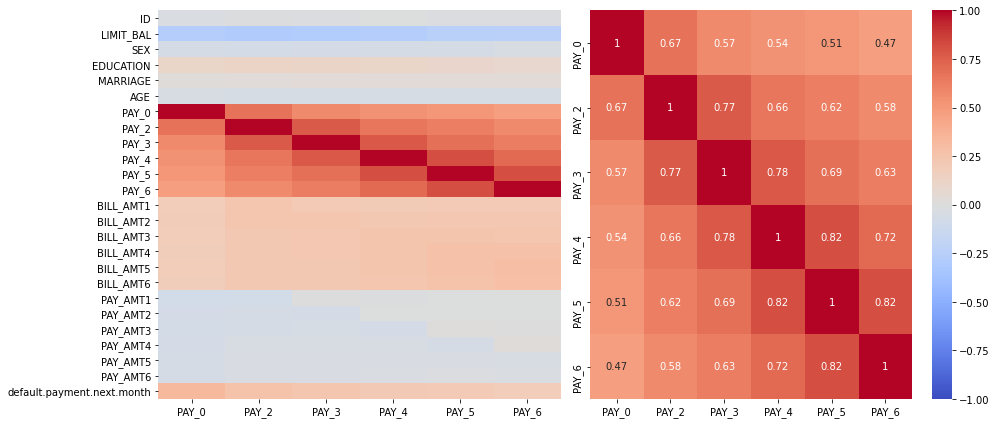

In [47]:
pays = [f'PAY_{i}'for i in range(7) if i!=1]

plt.figure(figsize=(14,6))
plt.subplot(121)
cor = df.corr()[pays]
sns.heatmap(cor, vmin=-1, vmax=1, cmap=sns.color_palette("coolwarm", as_cmap=True),cbar=False)


plt.subplot(122)
cor = df[pays].corr().T
sns.heatmap(cor, vmin=-1, vmax=1, cmap=sns.color_palette("coolwarm", as_cmap=True),annot = True)

plt.tight_layout()
plt.show()